In [73]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


# **Master preprocessing**

In [103]:
df = pd.read_csv('collected_data/2023_10_07_cl/cl_111.csv', index_col=0)

In [105]:
emgs=np.char.add('emg', np.arange(0, 8).astype(str))

In [110]:
df_melt = df[np.append(['gt'], emgs)].melt(id_vars='gt',value_vars=emgs,var_name='emg')

# **Exploring Methods**

In [308]:
def get_coact_mat(csv, method='mean', norm_by='all', truncate=0., trim=0.):
    '''
    Parameters
    ----------
    csv: str
        path to csv file of data
    method: str
        'mean' or 'median' or other method (to be implemented) to generalize coactivation value
    norm_by: str
        'all' or 'emg'. normalization group
    truncate: float
        factor to truncate each side by

    Returns
    -------
    coactivation_mat: pd.DataFrame()
    '''
    
    df = pd.read_csv(csv, index_col=0)
    emgs=np.char.add('emg', np.arange(0, 8).astype(str))
    df_melt = df[np.append(['gt'], emgs)].melt(id_vars='gt',value_vars=emgs,var_name='emg')

    # truncate
    if truncate > 0:
        coactivation_mat = df_melt.groupby(['gt','emg'])['value'].apply(lambda x: x[int(truncate*len(x)):-int(truncate*len(x))]).reset_index().drop(columns='level_2')
    else:
        coactivation_mat = df_melt

    # trim
    if trim > 0:
        coactivation_mat = coactivation_mat.groupby(['gt','emg'])['value'].apply(lambda x: x.sort_values()[int(trim*len(x)):-int(trim*len(x))]).reset_index().drop(columns='level_2')
    
    if (trim == 0) & (truncate == 0):
        coactivation_mat = df_melt

    # apply method and pivot
    coactivation_mat = coactivation_mat.groupby(['gt','emg']).apply(method).reset_index().pivot(index='gt', columns='emg', values='value')

    # normalization
    if norm_by == 'all':
        norm_factor = np.max(coactivation_mat)
    if norm_by == 'emg':
        norm_factor = np.max(coactivation_mat, axis=0)
    coactivation_mat = coactivation_mat/norm_factor

    # plot
    fig, ax = plt.subplots()
    ax.imshow(coactivation_mat, cmap='Blues')
    ax.set_xticks(np.arange(len(emgs)), labels=emgs)
    ax.set_yticks([0,1,2], labels=['relax','open','close'])
    ax.set_title(method + ', normalized by: ' + norm_by + ', truncate factor: ' + str(truncate) + ', trim factor: ' + str(trim))

    # return
    return coactivation_mat

In [309]:
def plot_coact_mat(coactivation_mat):
    fig, ax = plt.subplots()
    ax.imshow(coactivation_mat, cmap='Blues')
    ax.set_xticks(np.arange(len(emgs)), labels=emgs)
    ax.set_yticks([0,1,2], labels=['relax','open','close'])

In [316]:
def plot_raw(csv):
    df = pd.read_csv(csv, index_col=0)
    plt.figure(figsize=(20,7))

    for i in range(7):
        emg='emg'+str(i)
        plt.plot(df[emg], label=emg)

    plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==0, facecolor='blue', alpha=.1, label='relax')
    plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==1, facecolor='green', alpha=.1, label='open')
    plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==2, facecolor='red', alpha=.1, label='close')

    plt.legend()

In [310]:
csv = 'collected_data/2023_10_07_cl/cl_111.csv'

## Simple mean, simple normalization across *all* signals

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.071346,0.173763,0.355581,0.101266,0.146145,0.069045,0.063291,0.135788
1,0.079402,0.233602,0.890679,0.231300,0.346375,0.154200,0.128884,0.072497
2,0.207135,0.573072,1.000000,0.379747,0.471807,0.461450,0.177215,0.407365


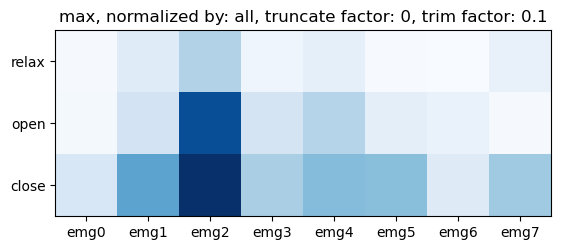

In [332]:
get_coact_mat(csv, method='max', norm_by='all', truncate=0,  trim=0.1)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.051996,0.065576,0.139425,0.065389,0.051478,0.048786,0.052060,0.058839
1,0.147186,0.328436,1.000000,0.330440,0.110575,0.070740,0.107228,0.454975
2,0.604372,0.289286,0.751237,0.335080,0.113315,0.111012,0.288763,0.386255


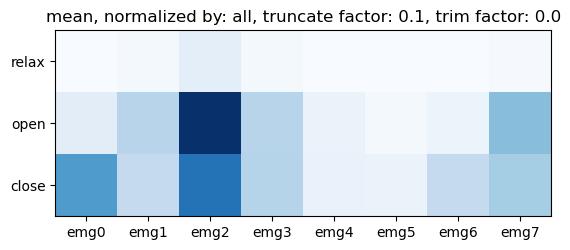

In [311]:
get_coact_mat(csv, method='mean', norm_by='all', truncate=0.1)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.050161,0.064212,0.149345,0.064168,0.050446,0.047973,0.050914,0.055849
1,0.147416,0.334844,1.000000,0.332415,0.111565,0.070675,0.104064,0.453398
2,0.599301,0.289040,0.732843,0.331777,0.112818,0.110626,0.285907,0.389080


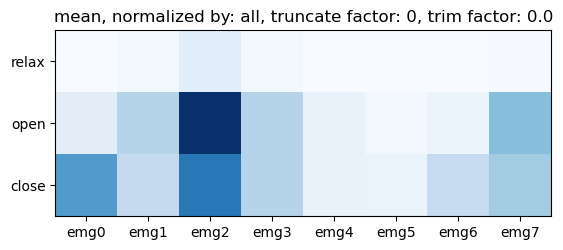

In [312]:
get_coact_mat(csv, method='mean', norm_by='all', truncate=0)

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.046914,0.051852,0.054321,0.051852,0.049383,0.049383,0.049383,0.049383
1,0.140741,0.311111,1.000000,0.323457,0.106173,0.069136,0.091358,0.439506
2,0.543210,0.269136,0.765432,0.335802,0.113580,0.108642,0.291358,0.365432


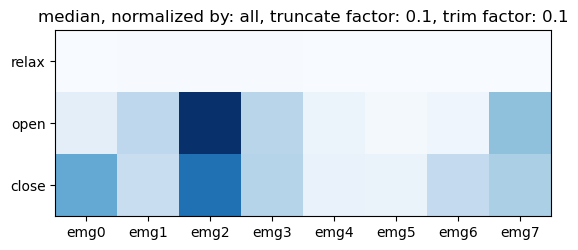

In [313]:
get_coact_mat(csv, method='median', norm_by='all', truncate=0.1, trim=0.1)

## Simple mean, simple normalization within each signal

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.083699,0.191766,0.149345,0.193036,0.447145,0.433655,0.178079,0.123178
1,0.245980,1.000000,1.000000,1.000000,0.988896,0.638863,0.363979,1.000000
2,1.000000,0.863205,0.732843,0.998078,1.000000,1.000000,1.000000,0.858142


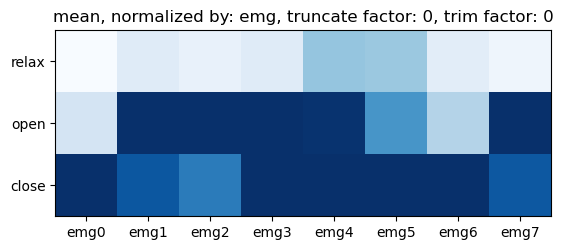

In [314]:
get_coact_mat(csv, method='mean', norm_by='emg', truncate=0, trim=0)

## Simple median, simple normalization across *all* signals

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.046914,0.051852,0.054321,0.051852,0.049383,0.049383,0.049383,0.049383
1,0.140741,0.311111,1.000000,0.323457,0.106173,0.069136,0.091358,0.439506
2,0.543210,0.269136,0.765432,0.335802,0.113580,0.108642,0.291358,0.365432


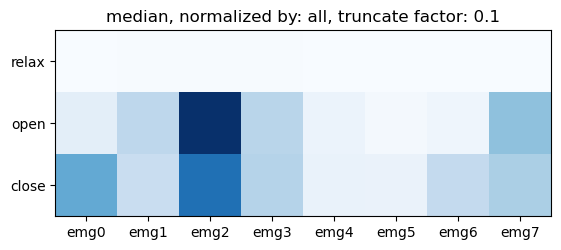

In [258]:
get_coact_mat(df_melt, method='median', norm_by='all', truncate=0.1)

## Simple median, simple normalization within each signal

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.086364,0.166667,0.054321,0.154412,0.434783,0.454545,0.169492,0.112360
1,0.259091,1.000000,1.000000,0.963235,0.934783,0.636364,0.313559,1.000000
2,1.000000,0.865079,0.765432,1.000000,1.000000,1.000000,1.000000,0.831461


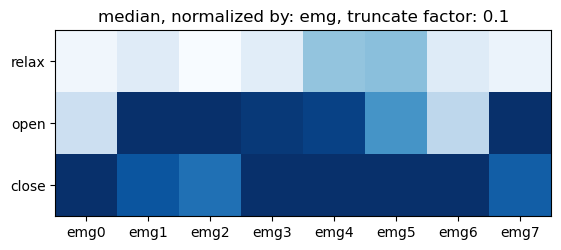

In [259]:
get_coact_mat(df_melt, method='median', norm_by='emg', truncate=0.1)

# More random testing

In [329]:
p = pd.read_csv('collected_data/2023_07_25_p4/p4_11.csv')
p[p['gt']==1]

,Unnamed: 0,gt,time_elapsed,current_time,current_task,motor_position,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7


emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.186275,0.284314,0.186275,0.186275,0.166667,0.151961,0.107843,0.112745
2,0.480392,1.000000,0.426471,0.632353,0.495098,0.348039,0.250000,0.274510


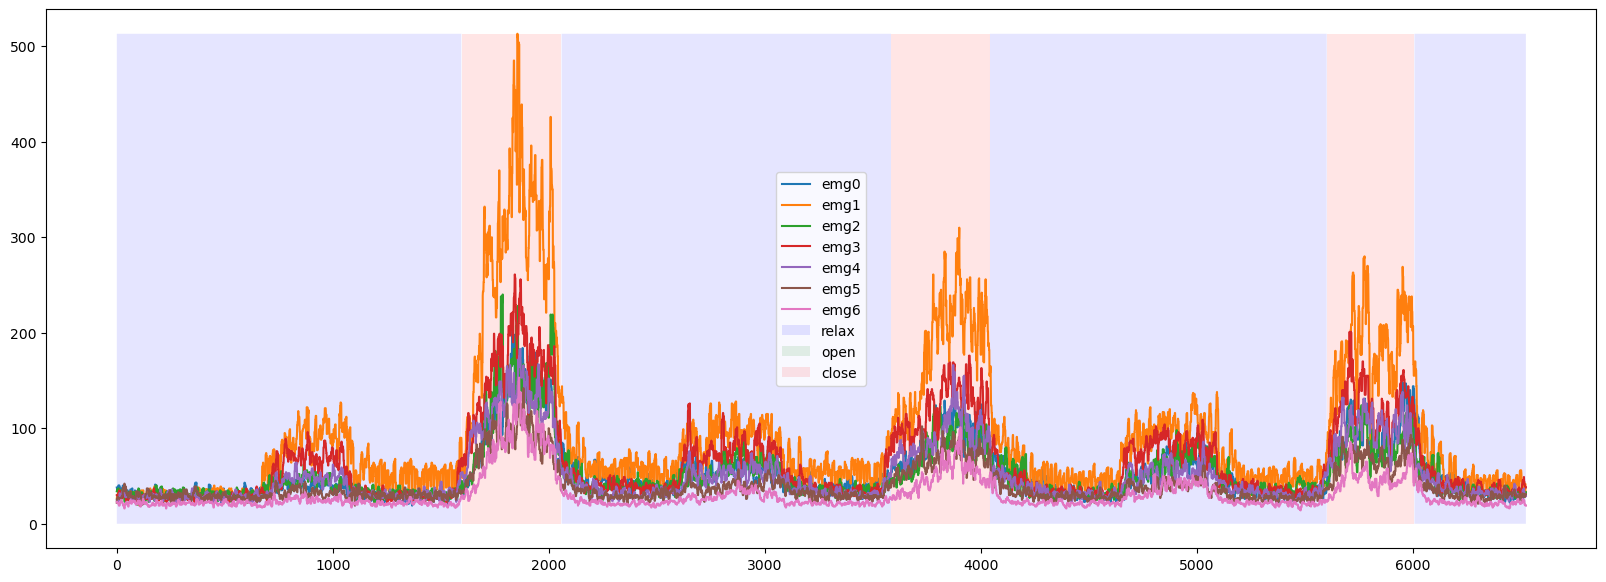

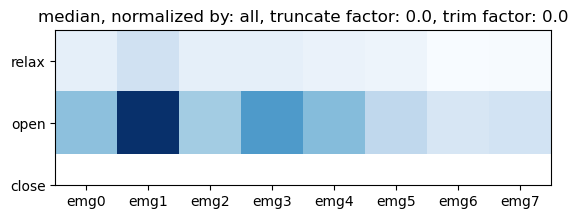

In [325]:
csv = 'collected_data/2023_07_25_p4/p4_11.csv'
plot_raw(csv)
get_coact_mat(csv, method='median', norm_by='all')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.215827,0.374101,0.244604,0.273381,0.223022,0.187050,0.158273,0.158273
2,0.514388,1.000000,0.460432,0.669065,0.510791,0.374101,0.323741,0.338129


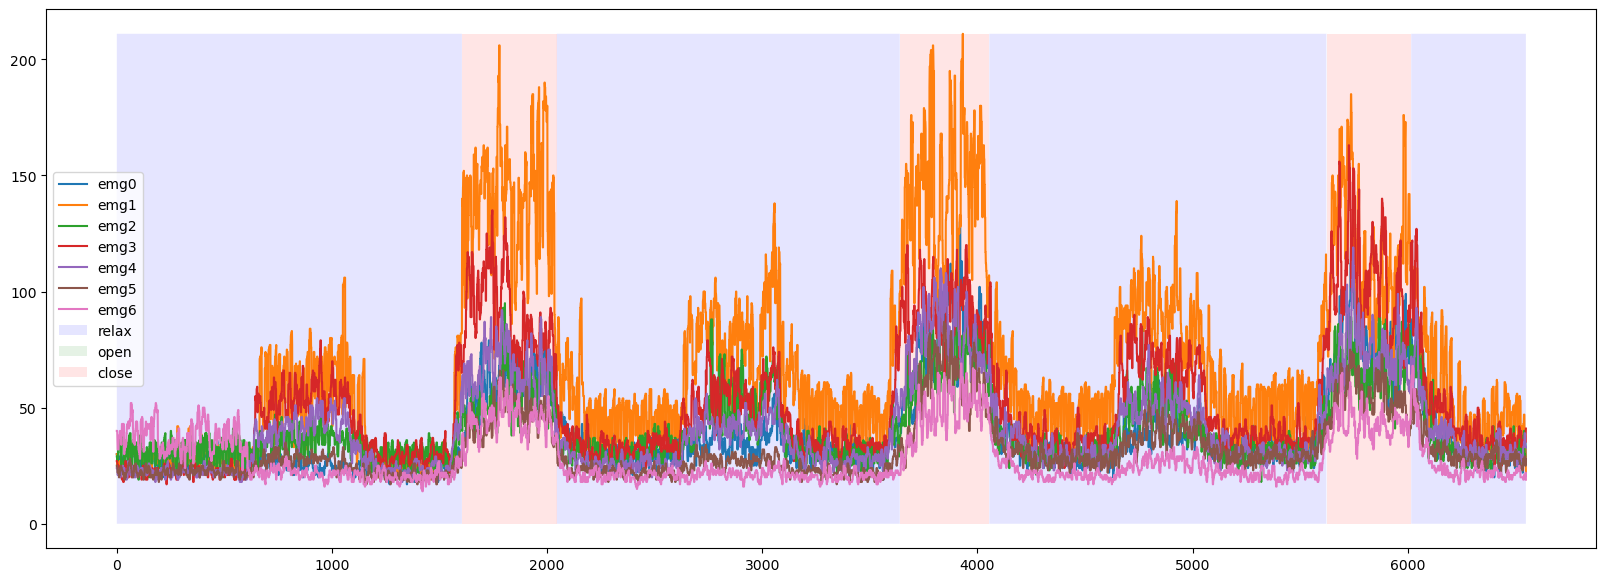

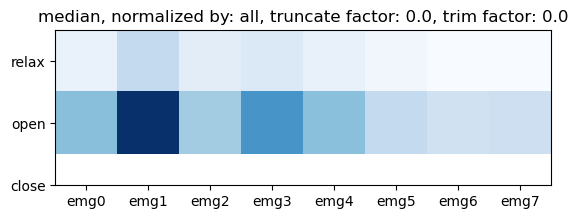

In [326]:
csv = 'collected_data/2023_07_25_p4/p4_12.csv'
plot_raw(csv)
get_coact_mat(csv, method='median', norm_by='all')

emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.073555,0.145359,0.168126,0.082312,0.089317,0.054291,0.052539,0.085814
1,0.084063,0.250438,1.000000,0.224168,0.352014,0.108581,0.078809,0.068301
2,0.155867,0.425569,0.915937,0.337128,0.476357,0.343257,0.108581,0.332750


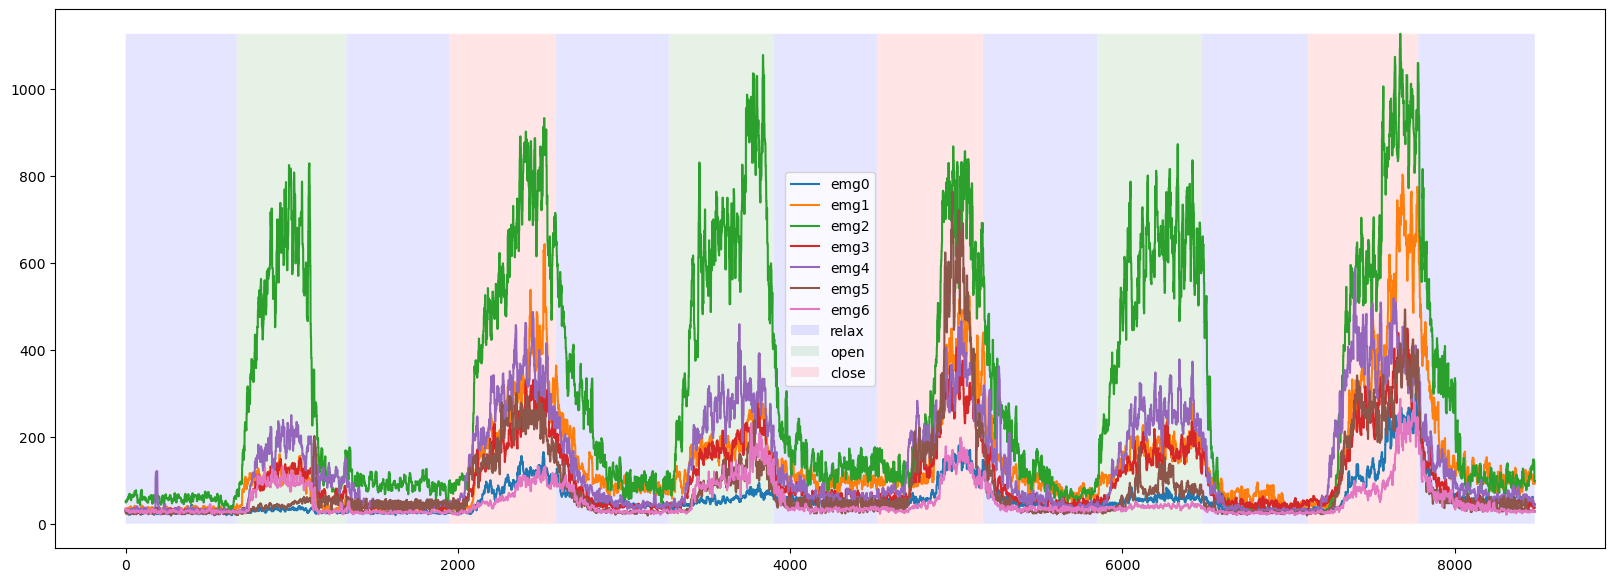

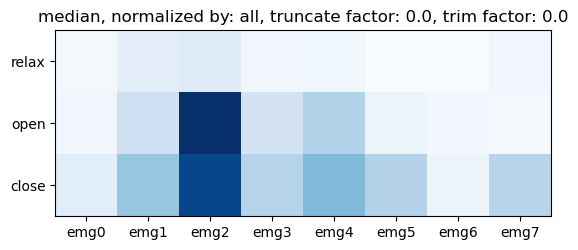

In [330]:
csv = 'collected_data/2024_01_09_p1/p1_111.csv'
plot_raw(csv)
get_coact_mat(csv, method='median',norm_by='all')

# **EMG Visualization**

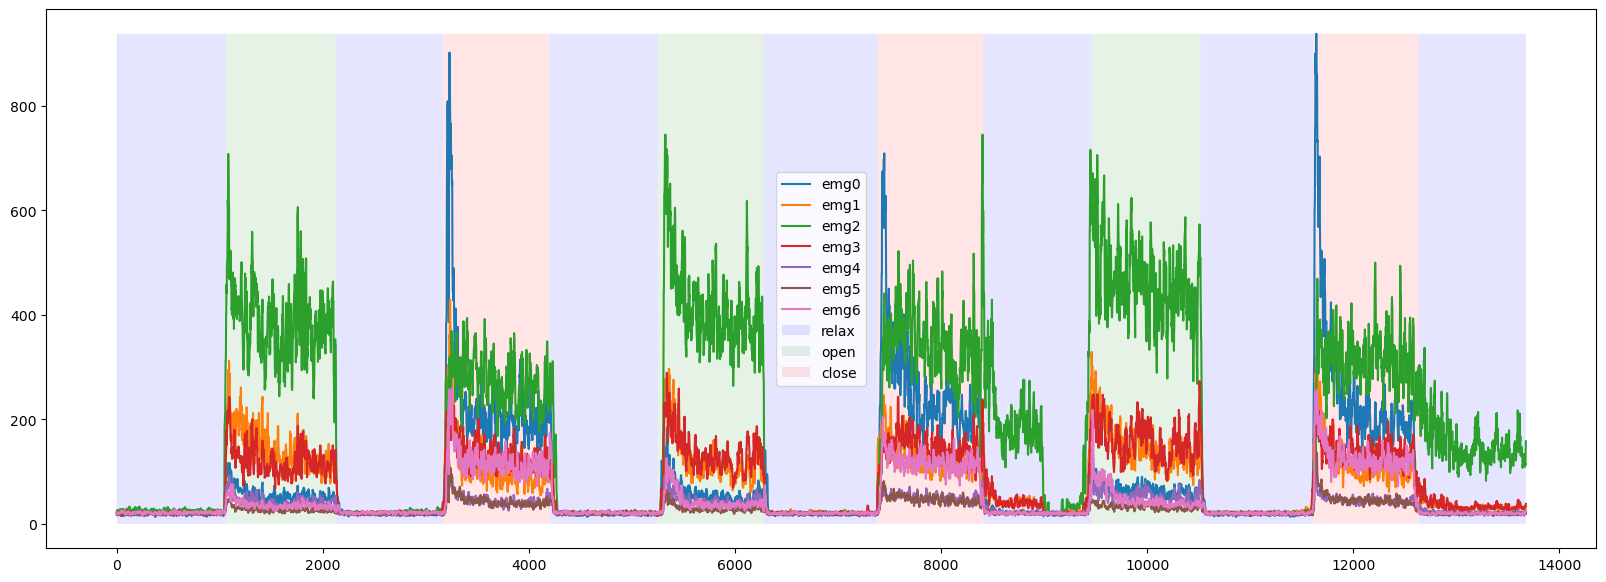

In [205]:
plt.figure(figsize=(20,7))

for i in range(7):
    emg='emg'+str(i)
    plt.plot(df[emg], label=emg)

plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==0, facecolor='blue', alpha=.1, label='relax')
plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==1, facecolor='green', alpha=.1, label='open')
plt.fill_between(df.index, np.max(df[emgs]), where=df['gt']==2, facecolor='red', alpha=.1, label='close')

plt.legend()

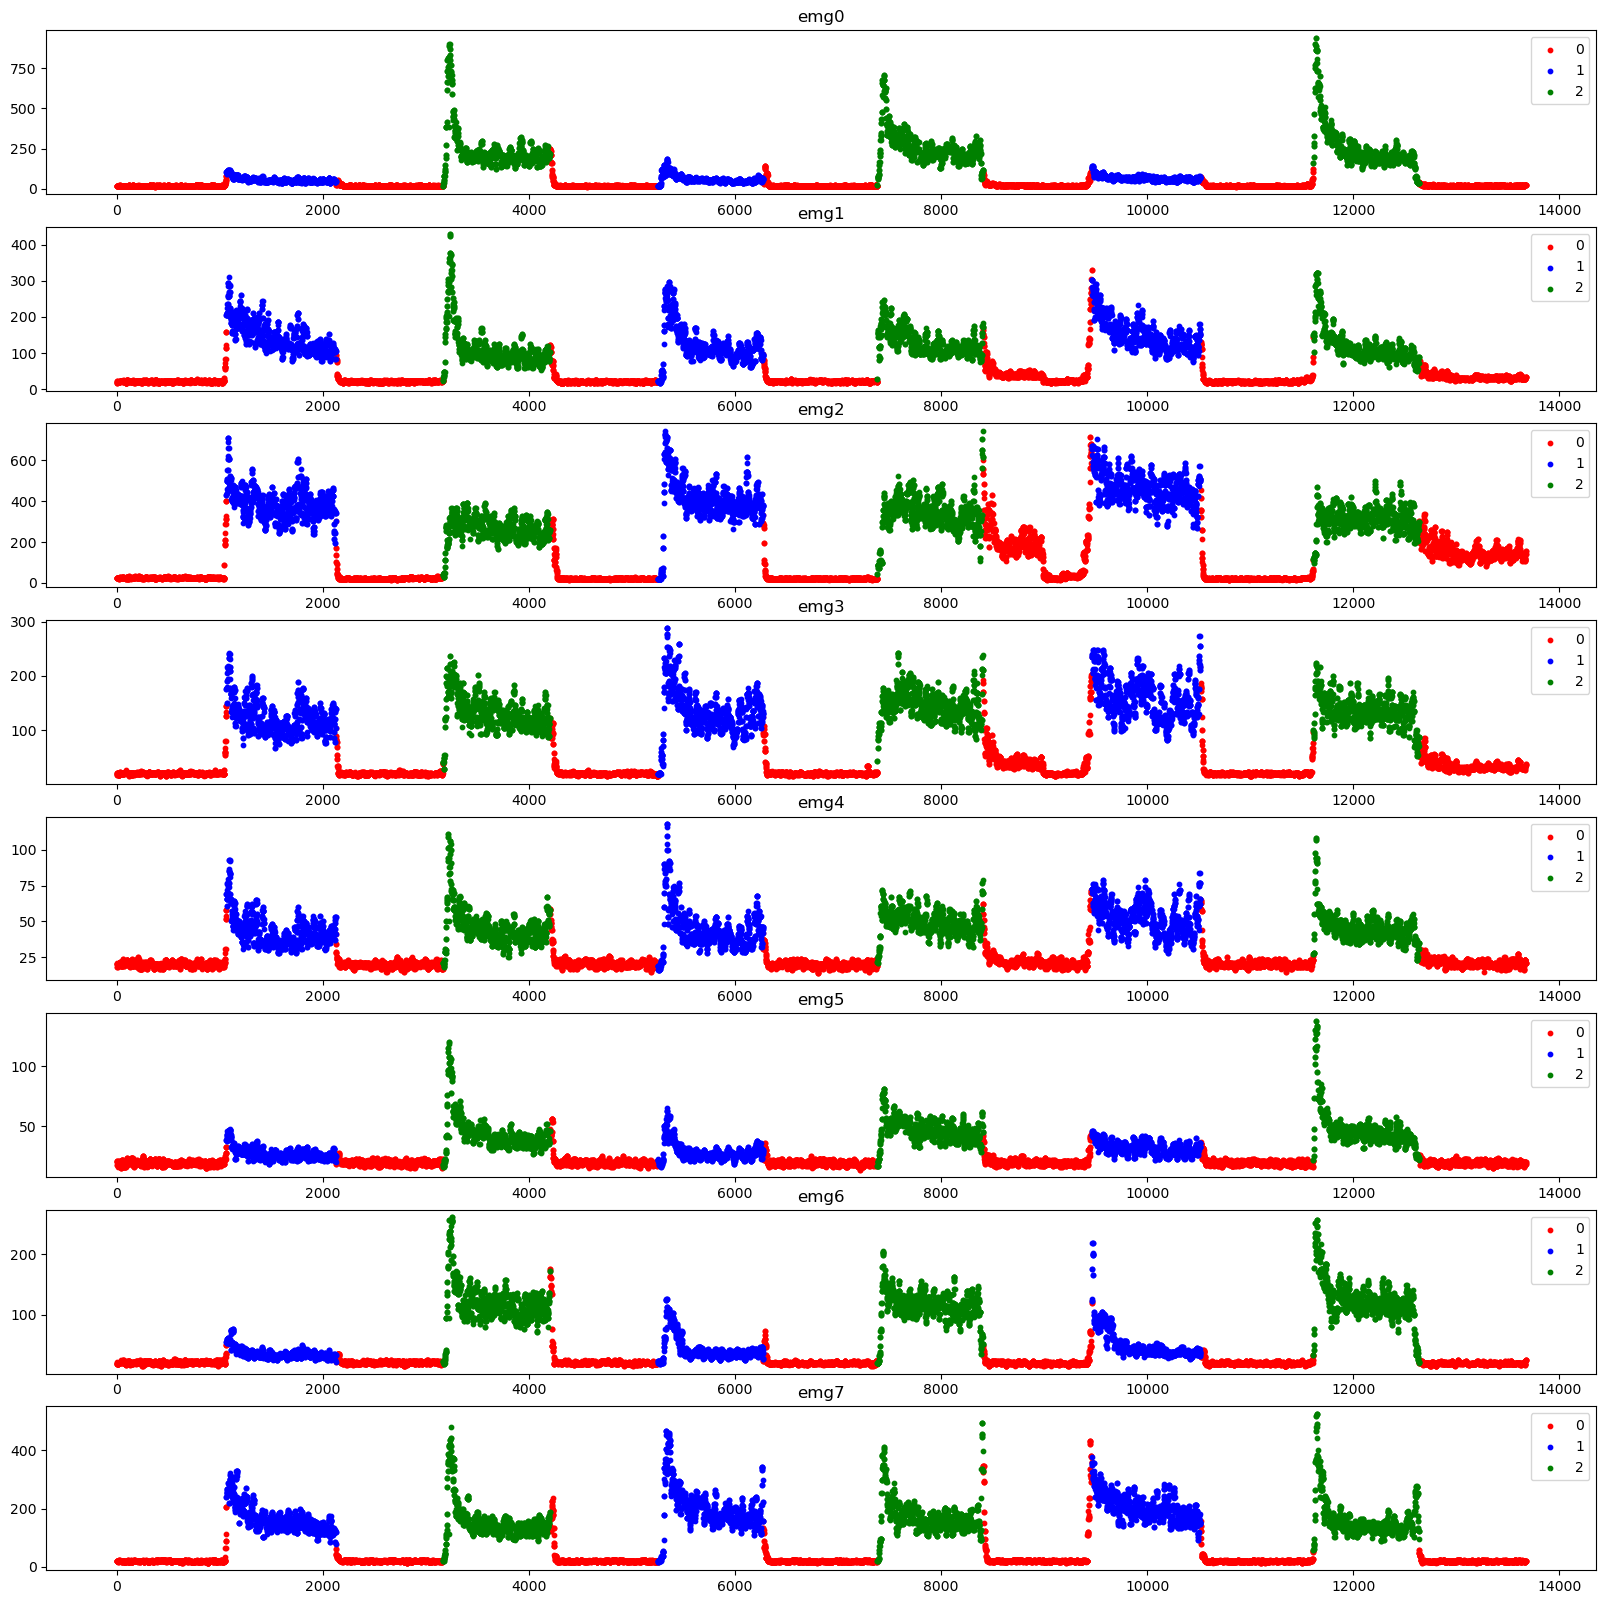

In [72]:
fig, ax = plt.subplots(8, figsize=(20,20))

for emg in range(8):
    x = df.index
    y = df['emg'+str(emg)]
    c = df['gt']
    cdict = {0: 'red', 1: 'blue', 2: 'green'}
    
    for i in range(3):
        ix = np.where(c.values == i)[0]
        ax[emg].scatter(x[ix], y[ix], c = cdict[i], label = i, s = 10, zorder=2)

    ax[emg].set_title('emg'+str(emg))
    ax[emg].legend()